# Decision Tree parameters and classification metrics.


In this Notebook, the main objective is to understand the parameters of the Decision Tree model and how to evaluate the model based on the different metrics we studied.

By the end of this study you should have:
- a good understanding of the effect of the different parameters in the Decision Tree classifier.
- gained experience with building the decision matrix and classification metrics.

### 1 Using nested loops and with a split ratio of 20 testing:80 training, try to find the best combined parameters that provide the best accuracy for the testing dataset from:
- max_depth values between 3 and 5 with a step of 1.
- max_leaf_nodes values between 10 and 20 with a step of 5.
- min_samples_leaf with values between 10 and 25 with a step of 5.

Plot your results for the testing and training accuracies for each step.

Note: you should end up with 36 plots for the above parameter possible valules.

## Step 1
### Importing packages
##### - Numpy packages are used to work on array
##### - Pandas packages are used for working on dataframes while fetching the data from csv and while creating features and target dataframe for Machine learning models.
##### - Matplotlib packages are used for plotting/visualing the data.

In [1]:
#Import standard packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 2
### Importing data from file
##### - using read_csv() function of pandas to fetch the data from our csv file into a dataframe.
##### - our dataset is of customer churn data of a telecom company, based on various characteristics we can predict whether the customer will leave or not

In [2]:
#https://www.kaggle.com/becksddf/churn-in-telecoms-dataset/data
#importing the dataset as dataframe
churn_data = pd.read_csv("customer_churn.csv")

#Top 5 records of dataset
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Creating 1000 random index to select 1000 random samples from our data

In [3]:
#Index for random 1000
idx = np.random.randint(3334, size=1000)
print(len(idx))
#print(idx)

1000


## Step 3
### Creating feature and target dataframes

* We will create our feature and target dataframes using following steps
    -  Select categorical feature and convert it into numeric
    -  Select the other important numeric features and dropping less important one
    -  Concatinating the converted categorical numeric value with feature to create feature dataframe
    -  Creating the target dataframe, by converting it into numeric binary class.

#### A) Select categorical feature and convert it into numeric

In [4]:
#importing LabelEncode from sklearn
from sklearn.preprocessing import LabelEncoder

#Creating label encoder object
le = LabelEncoder()

#fitting nd transforming categorical feature into label encoder
ip = le.fit_transform((churn_data[['international plan']].values.ravel()).astype('str'))
#print(len(ip))
ip

#creating data frame after transformtion
df1 = pd.DataFrame(ip, columns = ["international plan"])
df1.head()
#print(df1.shape)

,international plan
0,0
1,0
2,0
3,1
4,1


#### B) Select the other important numeric features and dropping less important one

In [5]:
#data
df = churn_data[['number vmail messages','total day minutes','total day calls','total day charge','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']]

#### C) Concatinating the converted categorical numeric value with feature to create feature dataframe

In [6]:
#concatinating data with categorical feature converted to numeric
df = pd.concat([df, df1], axis=1, sort=False)
print(df.shape)
df.head()

(3333, 14)


,number vmail messages,total day minutes,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan
0,25,265.1,110,45.07,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,26,161.6,123,27.47,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,243.4,114,41.38,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,299.4,71,50.90,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
4,0,166.7,113,28.34,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1


#### Selecting 1000 random features based on the 1000 random indexs that we created

In [7]:
#creating feature data frame
X_df = df.loc[idx,['number vmail messages','total day minutes','total day calls','total day charge','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls','international plan']]
print(X_df.shape)
X_df

(1000, 14)


,number vmail messages,total day minutes,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan
1673,0,174.7,83,29.70,122,23.87,171.7,80,7.73,10.5,8,2.84,5,0
2504,0,167.5,96,28.48,104,11.82,138.4,87,6.23,13.0,1,3.51,1,0
1505,0,223.0,120,37.91,98,19.30,188.3,125,8.47,8.8,5,2.38,1,0
3081,0,174.3,85,29.63,95,21.60,176.4,96,7.94,5.9,3,1.59,6,0
3244,0,231.3,87,39.32,88,19.10,214.6,69,9.66,7.2,7,1.94,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,192.8,68,32.78,86,13.43,235.5,105,10.60,12.7,6,3.43,1,0
2206,0,176.2,120,29.95,138,20.06,152.5,104,6.86,10.6,4,2.86,1,0
3209,24,125.7,92,21.37,98,23.45,214.5,108,9.65,14.2,6,3.83,3,1
1435,19,112.6,114,19.14,132,22.24,123.5,116,5.56,11.1,2,3.00,0,1


#### D) Creating the target dataframe, by converting it into numeric binary class

In [8]:
#creating target dataframe
#selecting the target for same index that we used to select feature
y = churn_data.loc[idx,['churn']].astype(int)
y

,churn
1673,0
2504,0
1505,0
3081,0
3244,0
...,...
1543,0
2206,0
3209,1
1435,1


##### Here we used `np.random.randint` function on our dataframe. 
##### This function is used to select the random integers, which we used as our indexes to get the randomm records from our data. The purpose of doing that was, we don't want our model to fit and work on biased data. Hence, we provided random values.

<br><br>

## Step 4
### Split the data into 20% testing and 80% training data.

#### Splitting the data
##### train_test_split() method is used from sklearn package, model selection module which splits the features and target data into training and testing dataset. here, we are using the test_size as 0.20 which well set the test data percentage as 20%

In [9]:
#importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

#creating train and test dataset with train percentage as 0.05
X_train, X_test, y_train, y_test = train_test_split(X_df,y,random_state = 654,test_size=0.20,train_size=0.80)

#### Calculating train and test percentages and shape

In [10]:
#Train accuracy percentage
print("Training data percentage is {:.2f}".format(len(X_train)/len(X_df)*100)+" %")
#Test accuracy percentage
print("Test data percentage is {:.2f}".format((len(X_test)/len(X_df))*100)+" %")

print("\n")

#Tain and test feature dataset shapes
print("Features train shape"+str(X_train.shape))
print("Features test shape"+str(X_test.shape))

print("\n")

#Tain and test target dataset shapes
print("Target train shape"+str(y_train.shape))
print("Target test shape"+str(y_test.shape))

Training data percentage is 80.00 %
Test data percentage is 20.00 %


Features train shape(800, 14)
Features test shape(200, 14)


Target train shape(800, 1)
Target test shape(200, 1)


## Step 5 
### Decision Tree classifier 
-  `DecisionTreeClassifier` from sklearn.tree will be used to as a classifier to predict the class based on the input feature data.
-  The DecisionTreeClassifier take the feature data and calculate the gini index/entropy for each feature and the feature with the highest value is chosen as the root node and the tree keeps classifying the data until it reaches a leaf node with no impurity.
-  We can also prun the tree using various parameters such as `max_depth` which specify the maximum depth the tree should traverse or `max_leaf_nodes` which specify the maximum number of leaf nodes the tree can have. As soon as one those conditions are met the tree stop classifying further.

<br>

#### Building the model for the classifier parameters

In [11]:
#Creating parameters list
#max_depth list
max_depth = [3,4,5]
#Max_leaf list
max_leaf_nodes = [10,15,20]
#min_sample_leaf parameter list
min_samples_leaf = [10,15,20,25]

#creating train and test accuracy list
train_accuracies = []
test_accuracies = []

#looping the classifier for all the parameter values
for i in max_depth:
    for j in max_leaf_nodes:
        for k in min_samples_leaf:

            
            #Building the model 

            # 1 importing the DecisionTreeClasssifier
            from sklearn.tree import DecisionTreeClassifier

            # 2 creating an object of DecisionTreeClasifier
            tree = DecisionTreeClassifier(random_state=99,max_depth=i,max_leaf_nodes=j,min_samples_leaf=k)

            # 3 fitting the training into model
            tree.fit(X_train,y_train)
            
            # 4 predicting target for DecisionTreeClassifier
            y_pred = tree.predict(X_test)
            #print(y_pred[0:5])
            
            # 5 importing accuracy_score from sklearn.metrics
            #The accuracy score which helps in calculating the train and test accuracy based on the number of correctly classified data
            from sklearn.metrics import accuracy_score

            # 6 calculating train accuracy for without scaled data for logistic regression
            train_accuracy = tree.score(X_train,y_train)
            print("Train accuracy of Decision Tree for Max_Depth = {:d}, Max_Leaf_Node = {:d}, Min_Samples_Leaf = {:d} is  {:.2f}".format(i,j,k,train_accuracy*100)+"%")
            train_accuracies.append(train_accuracy)

            # 7 calculating test accuracy for without scaled data for logistic regression
            test_accuracy = accuracy_score(y_test,y_pred)
            print("Test accuracy of Decision Tree for Max_Depth  = {:d}, Max_Leaf_Node = {:d}, Min_Samples_Leaf = {:d} is  {:.2f}".format(i,j,k,test_accuracy*100)+"% \n\n")
            test_accuracies.append(test_accuracy)


Train accuracy of Decision Tree for Max_Depth = 3, Max_Leaf_Node = 10, Min_Samples_Leaf = 10 is  91.25%
Test accuracy of Decision Tree for Max_Depth  = 3, Max_Leaf_Node = 10, Min_Samples_Leaf = 10 is  89.00% 


Train accuracy of Decision Tree for Max_Depth = 3, Max_Leaf_Node = 10, Min_Samples_Leaf = 15 is  91.50%
Test accuracy of Decision Tree for Max_Depth  = 3, Max_Leaf_Node = 10, Min_Samples_Leaf = 15 is  88.50% 


Train accuracy of Decision Tree for Max_Depth = 3, Max_Leaf_Node = 10, Min_Samples_Leaf = 20 is  91.50%
Test accuracy of Decision Tree for Max_Depth  = 3, Max_Leaf_Node = 10, Min_Samples_Leaf = 20 is  88.50% 


Train accuracy of Decision Tree for Max_Depth = 3, Max_Leaf_Node = 10, Min_Samples_Leaf = 25 is  91.50%
Test accuracy of Decision Tree for Max_Depth  = 3, Max_Leaf_Node = 10, Min_Samples_Leaf = 25 is  88.50% 


Train accuracy of Decision Tree for Max_Depth = 3, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is  91.25%
Test accuracy of Decision Tree for Max_Depth  = 3, M

In [12]:
#checking the train and test accuracies for all the parameter values
train_accurac = [round(num*100, 2) for num in train_accuracies]
print("Train Accuracies "+str(train_accurac))

test_accurac = [round(num*100, 2) for num in test_accuracies]
print("\nTest Accuracies "+str(test_accurac))

Train Accuracies [91.25, 91.5, 91.5, 91.5, 91.25, 91.5, 91.5, 91.5, 91.25, 91.5, 91.5, 91.5, 93.62, 92.62, 91.75, 91.75, 93.62, 92.62, 91.75, 91.75, 93.62, 92.62, 91.75, 91.75, 95.88, 93.25, 91.75, 91.75, 96.0, 93.25, 91.75, 91.75, 96.0, 93.25, 91.75, 91.75]

Test Accuracies [89.0, 88.5, 88.5, 88.5, 89.0, 88.5, 88.5, 88.5, 89.0, 88.5, 88.5, 88.5, 91.5, 88.0, 89.5, 89.5, 91.5, 88.0, 89.5, 89.5, 91.5, 88.0, 89.5, 89.5, 90.0, 88.0, 89.5, 89.5, 93.0, 88.0, 89.5, 89.5, 93.0, 88.0, 89.5, 89.5]


##### Creating parameter labels

In [13]:
#Creating parameter labels
xlabel = []
for i in max_depth:
    for j in max_leaf_nodes:
        for k in min_samples_leaf:
            #print(i,j,k)
            xlabel.append(str(i)+" "+str(j)+" "+str(k))
print(xlabel)

['3 10 10', '3 10 15', '3 10 20', '3 10 25', '3 15 10', '3 15 15', '3 15 20', '3 15 25', '3 20 10', '3 20 15', '3 20 20', '3 20 25', '4 10 10', '4 10 15', '4 10 20', '4 10 25', '4 15 10', '4 15 15', '4 15 20', '4 15 25', '4 20 10', '4 20 15', '4 20 20', '4 20 25', '5 10 10', '5 10 15', '5 10 20', '5 10 25', '5 15 10', '5 15 15', '5 15 20', '5 15 25', '5 20 10', '5 20 15', '5 20 20', '5 20 25']


##### Creating Accuracy dataframe

In [14]:
#Accuracy dataframe
Acc_df = pd.DataFrame({'Model Parameters':xlabel,'Train Accuracy': train_accurac,'Test Accuracy': test_accurac})
#Model parameters(Max_depth,Max_leaf_nodes,min_sample_leaf) with train and test accuracies
Acc_df.style.background_gradient(cmap='Blues')
#style.highlight_max(color='yellow').highlight_min(color='lightblue')

,Model Parameters,Train Accuracy,Test Accuracy
0,3 10 10,91.250000,89.000000
1,3 10 15,91.500000,88.500000
2,3 10 20,91.500000,88.500000
3,3 10 25,91.500000,88.500000
4,3 15 10,91.250000,89.000000
5,3 15 15,91.500000,88.500000
6,3 15 20,91.500000,88.500000
7,3 15 25,91.500000,88.500000
8,3 20 10,91.250000,89.000000
9,3 20 15,91.500000,88.500000


## Step 6
### Plotting the train and test accuracies for the DecisionTreeClassifier for each parameter values

0


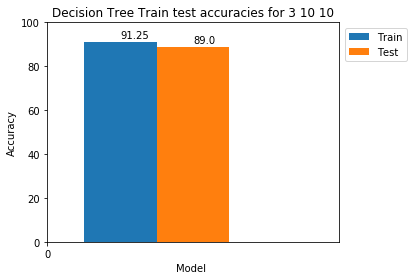

1


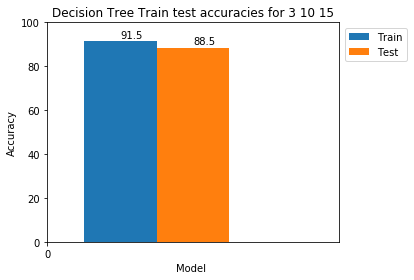

2


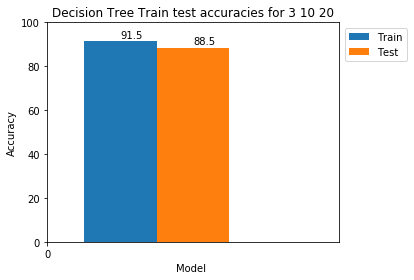

3


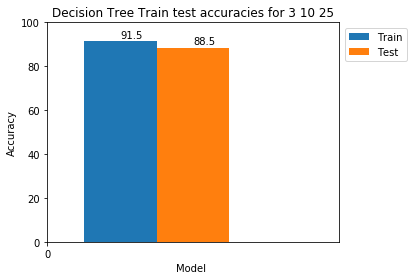

4


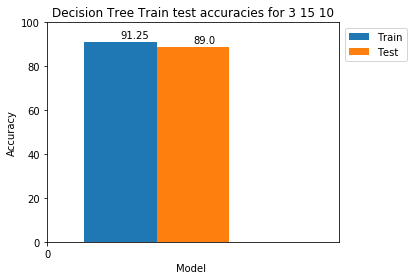

5


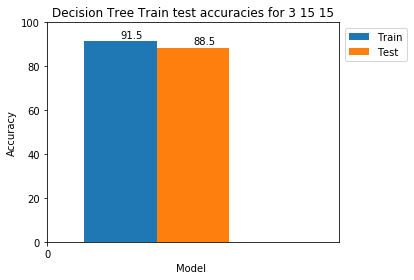

6


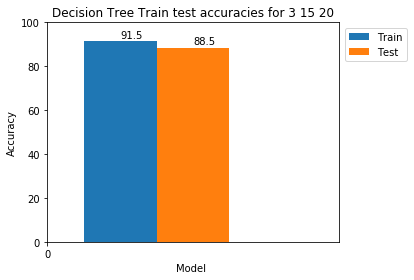

7


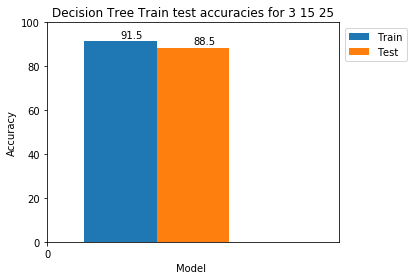

8


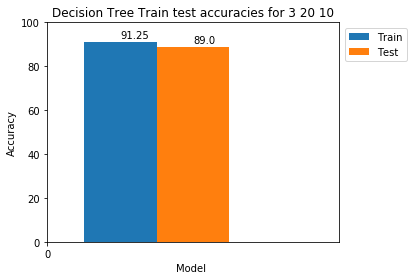

9


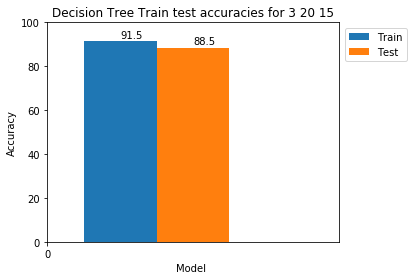

10


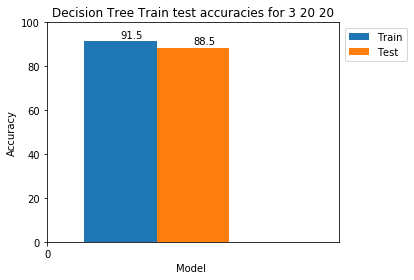

11


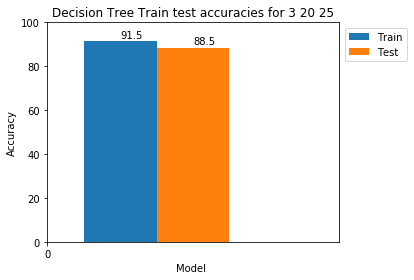

12


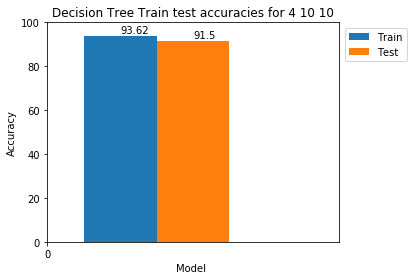

13


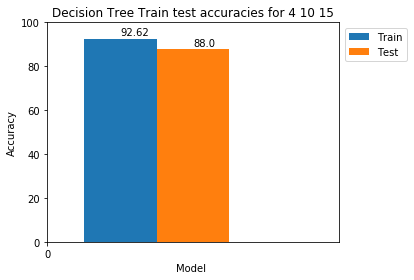

14


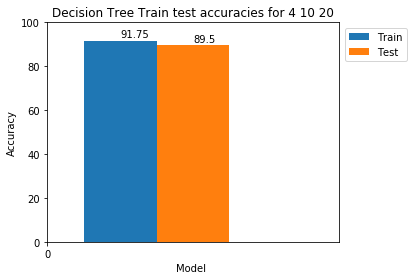

15


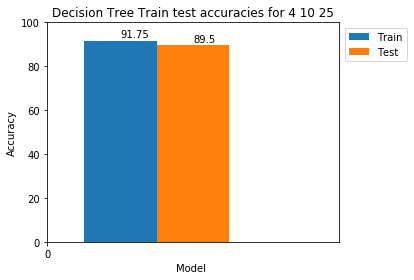

16


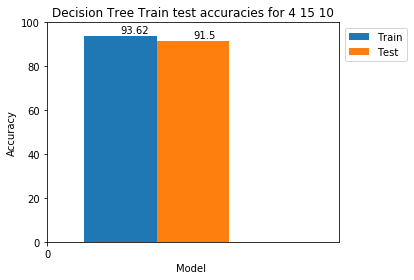

17


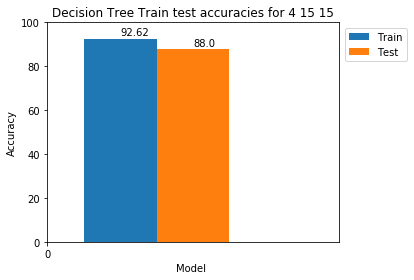

18


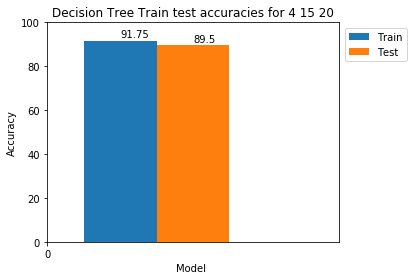

19


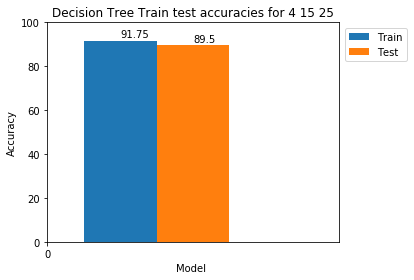

20


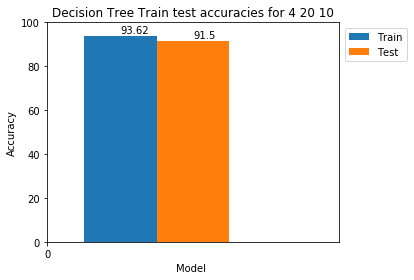

21


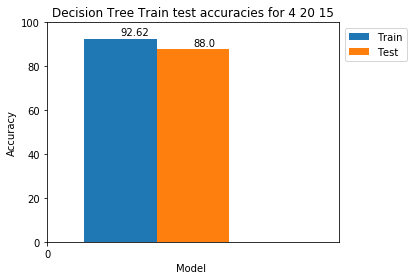

22


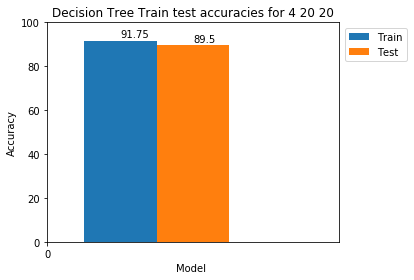

23


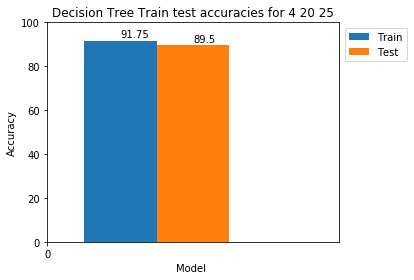

24


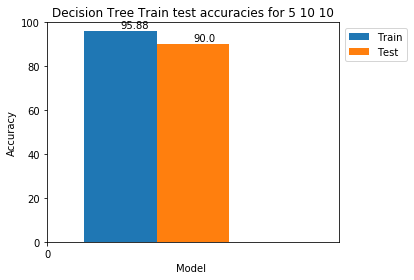

25


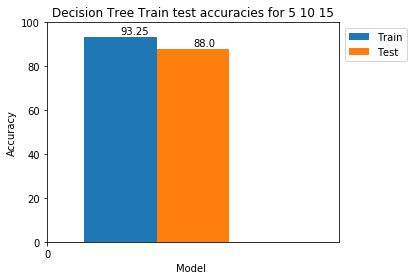

26


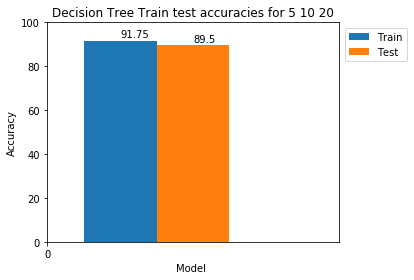

27


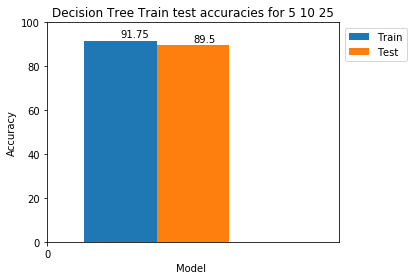

28


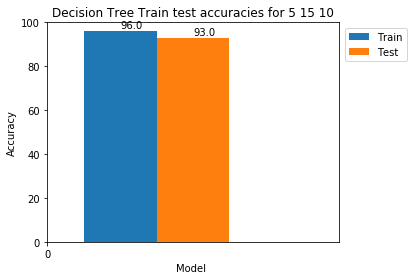

29


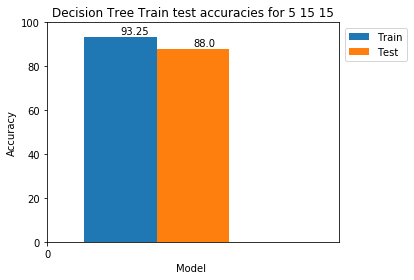

30


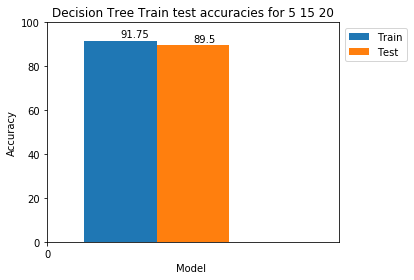

31


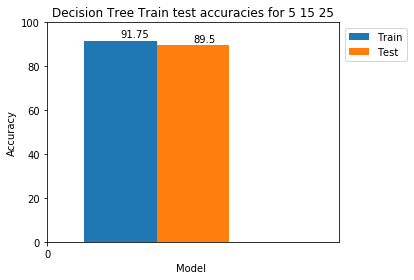

32


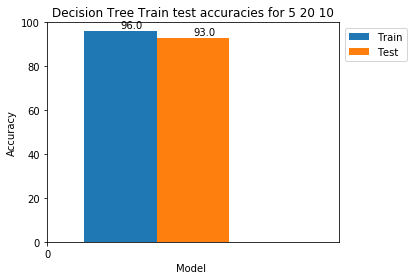

33


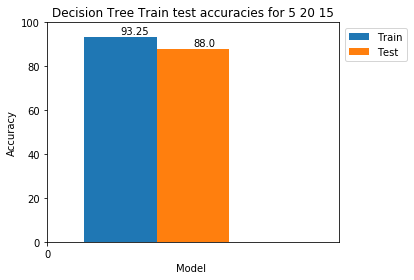

34


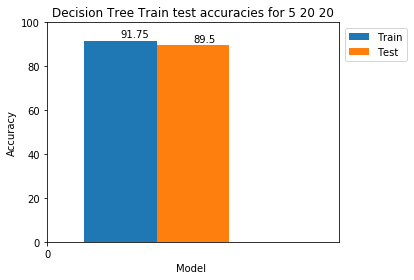

35


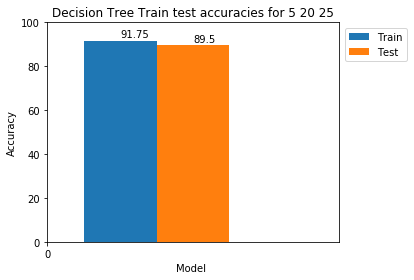

In [15]:
label = ['3 10 10']
for i in range(0,(len(max_depth)*len(max_leaf_nodes)*len(min_samples_leaf))):
    x = np.arange(len(label))
    print(i)
    width = 0.5  

    #fig= plt.figure(figsize=(5,4))
    fig, ax = plt.subplots(figsize=(6, 4))
    
    #train accuracy bar
    bar1 = ax.bar(x + width/2, train_accurac[i], width/2, label='Train')
    
    #test accuracy bar
    bar2 = ax.bar(x + width, test_accurac[i], width/2, label='Test')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Model ')
    ax.set_title('Decision Tree Train test accuracies for '+xlabel[i])
    ax.set_xticks(x)
    #ax.set_xticklabels(label)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 100])
    ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.9))

    
    #assigning the data labels
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            #print(height)
            ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points")


    autolabel(bar1)
    autolabel(bar2)

    fig.tight_layout()

    plt.show()

### For 2 models we got high train and test accuracies as shown below:

<table {margin-left: 0}>
  <thead>
    <tr>
      <th>Model Parameters</th>  
      <th>Train Accuracies</th>
      <th>Test Accuracies</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>5 15 10</td>
      <td>96.00%</td>
      <td>93.00%</td>
    </tr>
    <tr>
      <td>5 20 10</td>
      <td>96.00%</td>
      <td>93.00%</td>
    </tr>
  </tbody>
</table>




# 2 Explain your plots and results.

- The above plots shows the plot for train vs test accuracy for the models with different DecisionTreeClassifier parameters.
- Based on the results we have obtained above we have observed that overall the DecisionTreeClassifer performs well with high accuracy and quick respose time and for some parameter values of model such as `Max_depth = 5`, `Max_leaf_nodes = 15`, & `Min_sample_leaf = 10` and `Max_depth = 5`, `Max_leaf_nodes = 20`, & `Min_sample_leaf = 10` we have got the highest accuracy.

## 3- Create a for loop that splits the data into testing and training datasets starting from 5:95 ratio until you reach 20:80 ratio with a step of 5, on each step do the following:

##### Function to calculate the performance measure

In [16]:
#Function to calculate performance measures

#function to create confusion matrix values

def peformance_metrics(y_test,y_pred):
    y_test = np.array(y_test)
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0

    for i in range(len(y_pred)): 
        
        #if target test value is equal to the predicted value for class 1 
        if y_test[i]==y_pred[i]==1:
           true_negative += 1
        
        #if target test value is not equal to the predicted value for class 1
        if y_pred[i]==1 and y_test[i]!=y_pred[i]:
           false_positive += 1
        
        #if target test value is equal to the predicted value for class 0
        if y_test[i]==y_pred[i]==0:
           true_positive += 1
        
        #if target test value is not equal to the predicted value for class 0
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           false_negative += 1
    return(true_positive, false_positive, false_negative,true_negative)

#print(peformance_metrics(y_test,y_pred))

- Implement the Decision Trees classifier with the three parameters values found in step 1
    - We have got higest accuracy for parameter `max_depth = 5`, `max_leaf_nodes = 15` and `min_samples_leaf = 10` so we will consider these prameter values below for different test and train size.
- Calculate and display the Confusion Matrix.

Training data percentage is 95.00 %
Test data percentage is 5.00 %


Features train shape(950, 14)
Features test shape(50, 14)


Target train shape(950, 1)
Target test shape(50, 1)

Train accuracy of Decision Tree for Max_Node = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is  96.00%
Test accuracy of Decision Tree for Max_Node  = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is  100.00% 


Confusion Matrix for Max_Node  = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is 
[[45  0]
 [ 0  5]]
 

(45, 0, 0, 5)
True Positives for model are  : 45
False Positives for model are : 0
False Negatives for model are : 0
True Negatives for model are  : 5

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00         5

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



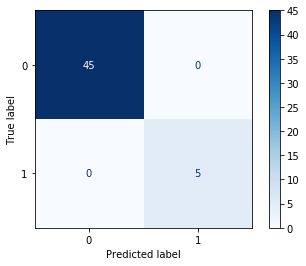

----------------------------------------------------------------------------------------------------------
Training data percentage is 90.00 %
Test data percentage is 10.00 %


Features train shape(900, 14)
Features test shape(100, 14)


Target train shape(900, 1)
Target test shape(100, 1)

Train accuracy of Decision Tree for Max_Node = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is  96.22%
Test accuracy of Decision Tree for Max_Node  = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is  97.00% 


Confusion Matrix for Max_Node  = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is 
[[85  1]
 [ 2 12]]
 

(85, 1, 2, 12)
True Positives for model are  : 85
False Positives for model are : 2
False Negatives for model are : 1
True Negatives for model are  : 12

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        86
           1       0.92      0.86      0.89        14

    accuracy                           0.97       100
   macro avg       0.95

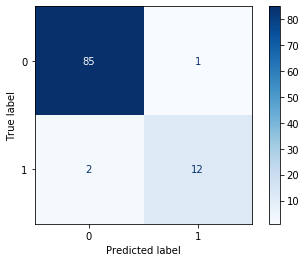

----------------------------------------------------------------------------------------------------------
Training data percentage is 85.00 %
Test data percentage is 15.00 %


Features train shape(850, 14)
Features test shape(150, 14)


Target train shape(850, 1)
Target test shape(150, 1)

Train accuracy of Decision Tree for Max_Node = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is  96.24%
Test accuracy of Decision Tree for Max_Node  = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is  96.00% 


Confusion Matrix for Max_Node  = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is 
[[130   1]
 [  5  14]]
 

(130, 1, 5, 14)
True Positives for model are  : 130
False Positives for model are : 5
False Negatives for model are : 1
True Negatives for model are  : 14

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       131
           1       0.93      0.74      0.82        19

    accuracy                           0.96       150
   macro avg     

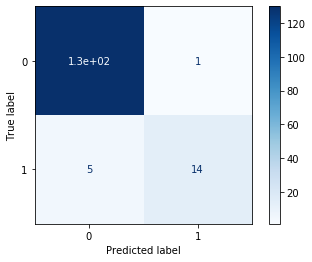

----------------------------------------------------------------------------------------------------------
Training data percentage is 80.00 %
Test data percentage is 20.00 %


Features train shape(800, 14)
Features test shape(200, 14)


Target train shape(800, 1)
Target test shape(200, 1)

Train accuracy of Decision Tree for Max_Node = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is  96.00%
Test accuracy of Decision Tree for Max_Node  = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is  93.00% 


Confusion Matrix for Max_Node  = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is 
[[167   5]
 [  9  19]]
 

(167, 5, 9, 19)
True Positives for model are  : 167
False Positives for model are : 9
False Negatives for model are : 5
True Negatives for model are  : 19

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       172
           1       0.79      0.68      0.73        28

    accuracy                           0.93       200
   macro avg     

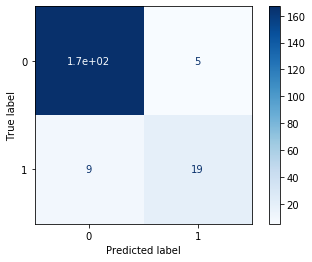

----------------------------------------------------------------------------------------------------------


In [17]:
#importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

test_size = [0.05,0.10,0.15,0.20]

TP = []
FP = []
FN = []
TN = []


#selecting values from above model paramters having high train and test accuracy
max_depth = 5
max_leaf_nodes = 15
min_samples_leaf = 10

for i in test_size:
    #creating train and test dataset with train percentage as 0.05
    X_train, X_test, y_train, y_test = train_test_split(X_df,y,random_state = 654,test_size=i,train_size=1-i)
    #print(i,1-i)
    
    #Train accuracy percentage
    print("Training data percentage is {:.2f}".format(len(X_train)/len(X_df)*100)+" %")
    #Test accuracy percentage
    print("Test data percentage is {:.2f}".format((len(X_test)/len(X_df))*100)+" %")

    print("\n")

    #Tain and test feature dataset shapes
    print("Features train shape"+str(X_train.shape))
    print("Features test shape"+str(X_test.shape))

    print("\n")

    #Tain and test target dataset shapes
    print("Target train shape"+str(y_train.shape))
    print("Target test shape"+str(y_test.shape))
    
    
    #Building the model 

    #importing the DecisionTreeClasssifier
    from sklearn.tree import DecisionTreeClassifier

    #creating an object of DecisionTreeClasifier
    tree = DecisionTreeClassifier(random_state=654,max_depth=max_depth,max_leaf_nodes=max_leaf_nodes,min_samples_leaf=min_samples_leaf)

    #fitting the training into model
    tree.fit(X_train,y_train)
            
    #predicting target for DecisionTreeClassifier
    y_pred = tree.predict(X_test)
    #print(y_pred[0:5])
            
    #importing accuracy_score from sklearn.metrics
    #The accuracy score which helps in calculating the train and test accuracy based on the number of correctly classified data
    from sklearn.metrics import accuracy_score

    #calculating train accuracy for without scaled data for logistic regression
    train_accuracy = tree.score(X_train,y_train)
    print("\nTrain accuracy of Decision Tree for Max_Node = {:d}, Max_Leaf_Node = {:d}, Min_Samples_Leaf = {:d} is  {:.2f}".format(max_depth,max_leaf_nodes,min_samples_leaf,train_accuracy*100)+"%")
    train_accuracies.append(train_accuracy)

    #calculating test accuracy for without scaled data for logistic regression
    test_accuracy = accuracy_score(y_test,y_pred)
    print("Test accuracy of Decision Tree for Max_Node  = {:d}, Max_Leaf_Node = {:d}, Min_Samples_Leaf = {:d} is  {:.2f}".format(max_depth,max_leaf_nodes,min_samples_leaf,test_accuracy*100)+"% \n\n")
    test_accuracies.append(test_accuracy)
    
    from sklearn.metrics import classification_report,confusion_matrix
    #printing confusion matrix
    cnf =  confusion_matrix(y_test,y_pred)
    print("Confusion Matrix for Max_Node  = {:d}, Max_Leaf_Node = {:d}, Min_Samples_Leaf = {:d} is \n".format(max_depth,max_leaf_nodes,min_samples_leaf)+str(cnf)+"\n \n")
    print(peformance_metrics(y_test,y_pred))
    
    true_positives = cnf[0][0]
    print("True Positives for model are  : {:d}".format(true_positives))
    TP.append(true_positives)
    
    false_positives = cnf[1][0]
    print("False Positives for model are : {:d}".format(false_positives))
    FP.append(false_positives)
    
    false_negatives = cnf[0][1]
    print("False Negatives for model are : {:d}".format(false_negatives))
    FN.append(false_negatives)
    
    true_negatives = cnf[1][1]
    print("True Negatives for model are  : {:d}".format(true_negatives)+"\n")
    TN.append(true_negatives)
    
    clf = classification_report(y_test,y_pred)
    print(clf)
    
    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(tree,X_test, y_test,cmap=plt.cm.Blues)
    plt.show()
    print("----------------------------------------------------------------------------------------------------------")

## 4- Using the information from the Confussion Matrix above, calculate the following metrics
- **Accuracy :** Accuracy is just the number of predictions that are correct divided by the total number of predictions
- **Precision :** Precision means we are considering only those predictions where we predicted class 1 and determining what proportion of those were actually class 1
- **Recall :** Recall means we are considering only those predictions where the true class is 1 and determining what proportion of those we predicted to be in class 1
- **F score :** F score is the harmonic mean of precision and recall, as there is a precision/recall trade-off, meaning that as you increase one you generally decrease the other, this is another metric that combines both recall and precision 
<br>

- Compare you results to that from python.




#### Calculating metrics using formula

In [18]:
#calculating metrics for all the model with different test and train size
for i in range(0,len(TP)):
    
    print("For Model with Test percentage = {:.2f}% and Train percentage = {:.2f}".format(test_size[i]*100,(1-test_size[i])*100)+"%\n")
    #calculating the accuracy
    accuracy = (TP[i] + TN[i]) / (TP[i] + TN[i] + FP[i] + FN[i])
    
    #calculating the precision
    precision = TP[i] / (TP[i] + FP[i])
    
    #calculating the recall
    recall = TP[i] / (TP[i] + FN[i])
    
    #calculating the F score
    f_score = (2 * precision * recall) / (precision + recall)

    #printing the metric values
    print("Accuracy for DecisionTreeClassifier is \t\t"+str(round(accuracy,2)))
    print("Precision for DecisionTreeClassifier is \t"+str(round(precision,2)))
    print("Recall for DecisionTreeClassifier is \t\t"+str(round(recall,2)))
    print("F_Score for DecisionTreeClassifier is\t\t{:.2f} ".format(f_score)+"\n")

For Model with Test percentage = 5.00% and Train percentage = 95.00%

Accuracy for DecisionTreeClassifier is 		1.0
Precision for DecisionTreeClassifier is 	1.0
Recall for DecisionTreeClassifier is 		1.0
F_Score for DecisionTreeClassifier is		1.00 

For Model with Test percentage = 10.00% and Train percentage = 90.00%

Accuracy for DecisionTreeClassifier is 		0.97
Precision for DecisionTreeClassifier is 	0.98
Recall for DecisionTreeClassifier is 		0.99
F_Score for DecisionTreeClassifier is		0.98 

For Model with Test percentage = 15.00% and Train percentage = 85.00%

Accuracy for DecisionTreeClassifier is 		0.96
Precision for DecisionTreeClassifier is 	0.96
Recall for DecisionTreeClassifier is 		0.99
F_Score for DecisionTreeClassifier is		0.98 

For Model with Test percentage = 20.00% and Train percentage = 80.00%

Accuracy for DecisionTreeClassifier is 		0.93
Precision for DecisionTreeClassifier is 	0.95
Recall for DecisionTreeClassifier is 		0.97
F_Score for DecisionTreeClassifier is	

##### On camparing the calculated values with the above confusion matrix for all the test and train size, for parameters `Max_depth = 5`, `Max_leaf_nodes = 15` and `Max_sample_leaf = 10`, we can observe that the values are same.

# 5- Is it required to scale the data for the Decision Trees model, why?



- It is not required to scale the data for DecisionTree model, as it calculates the Gini Index\Entropy and the one with Maximum value is selected as root node and the based on it, the DecisionClassifier forms the intermediate and leaf nodes, where it keep decreasing the impurity of a leaf till a point reached where leaf nodes are having maximum purity.
- Although, we can also prune the tree by setting the parameters such as Max_depth, Max_leaf_Nodes, Min_Sample_leaf which we have seen above, where the tree will stop classifying further when those parameter conditions are met.
- However, when we are comparing the DecisionTree with other model where data scaling is required, even the DecisionTree should be supplied with Scaled data to bring the comparision to same level. Here, even if we provided normalized data the DecisionTree will still classifiy based on the maximum entropy of the normalized features.

#### Model on scaled data to compare the performance measures\metric with data without scaled values

- we are developing the DecisionTreeClassifier with parameters values as `max_depth = 5`, `max_leaf_nodes = 15`,& `min_samples_leaf = 10` and `test size of 20%` and `train size of 80%` with scaled features.

##### Scaling the data using MinMaxScaler

In [19]:
#importing MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

#creating an object of MinMaxScaler
min_max = MinMaxScaler()

#fitting the data
min_max.fit(X_train)

#Transforming the training data
X_train_scaled = min_max.transform(X_train)

#Transforming the test data
X_test_scaled = min_max.transform(X_test)

#Train accuracy percentage
print("Training data percentage is {:.2f}".format(len(X_train)/len(X_df)*100)+" %")
#Test accuracy percentage
print("Test data percentage is {:.2f}".format((len(X_test)/len(X_df))*100)+" %")


Training data percentage is 80.00 %
Test data percentage is 20.00 %


##### Building model on scaled data


Train accuracy of Decision Tree for Max_Node = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is  96.00%
Test accuracy of Decision Tree for Max_Node  = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is  93.00% 


Confusion Matrix for Max_Node  = 5, Max_Leaf_Node = 15, Min_Samples_Leaf = 10 is 
[[167   5]
 [  9  19]]
 

(167, 5, 9, 19)
True Positives for model are  : 167
False Positives for model are : 9
False Negatives for model are : 5
True Negatives for model are  : 19

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       172
           1       0.79      0.68      0.73        28

    accuracy                           0.93       200
   macro avg       0.87      0.82      0.85       200
weighted avg       0.93      0.93      0.93       200



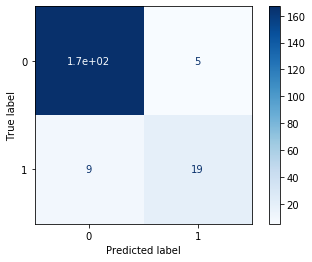

----------------------------------------------------------------------------------------------------------


In [20]:
#selecting values from above model paramters having high train and test accuracy
max_depth = 5
max_leaf_nodes = 15
min_samples_leaf = 10

#importing the DecisionTreeClasssifier
from sklearn.tree import DecisionTreeClassifier

#creating an object of DecisionTreeClasifier
tree = DecisionTreeClassifier(random_state=654,max_depth=max_depth,max_leaf_nodes=max_leaf_nodes,min_samples_leaf=min_samples_leaf)

#fitting the training into model
tree.fit(X_train_scaled,y_train)
            
#predicting target for DecisionTreeClassifier
y_pred_scaled = tree.predict(X_test_scaled)
#print(y_pred_scaled[0:5])
            
#importing accuracy_score from sklearn.metrics
#The accuracy score which helps in calculating the train and test accuracy based on the number of correctly classified data
from sklearn.metrics import accuracy_score

#calculating train accuracy for without scaled data for logistic regression
train_accuracy = tree.score(X_train_scaled,y_train)
print("\nTrain accuracy of Decision Tree for Max_Node = {:d}, Max_Leaf_Node = {:d}, Min_Samples_Leaf = {:d} is  {:.2f}".format(max_depth,max_leaf_nodes,min_samples_leaf,train_accuracy*100)+"%")
train_accuracies.append(train_accuracy)

#calculating test accuracy for without scaled data for logistic regression
test_accuracy = accuracy_score(y_test,y_pred_scaled)
print("Test accuracy of Decision Tree for Max_Node  = {:d}, Max_Leaf_Node = {:d}, Min_Samples_Leaf = {:d} is  {:.2f}".format(max_depth,max_leaf_nodes,min_samples_leaf,test_accuracy*100)+"% \n\n")
test_accuracies.append(test_accuracy)
    
from sklearn.metrics import classification_report,confusion_matrix
#printing confusion matrix
cnf =  confusion_matrix(y_test,y_pred_scaled)
print("Confusion Matrix for Max_Node  = {:d}, Max_Leaf_Node = {:d}, Min_Samples_Leaf = {:d} is \n".format(max_depth,max_leaf_nodes,min_samples_leaf)+str(cnf)+"\n \n")
print(peformance_metrics(y_test,y_pred_scaled))
  
true_positives = cnf[0][0]
print("True Positives for model are  : {:d}".format(true_positives))
    
false_positives = cnf[1][0]
print("False Positives for model are : {:d}".format(false_positives))
    
false_negatives = cnf[0][1]
print("False Negatives for model are : {:d}".format(false_negatives))
    
true_negatives = cnf[1][1]
print("True Negatives for model are  : {:d}".format(true_negatives)+"\n")
    
clf = classification_report(y_test,y_pred_scaled)
print(clf)
    
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree,X_test_scaled, y_test,cmap=plt.cm.Blues)
plt.show()
print("----------------------------------------------------------------------------------------------------------")

##### References:

https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py